<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Data Visualization</center>

# Data Viz S4: Plotting Advanced 

# Plotting Advanced
* Seaborn
* Bokeh


# Seaborn 

Seaborn
Seaborn, creado por Michael Waskom, "proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos". Seaborn ofrece una  API para explorar rápidamente diferentes representaciones visuales de sus datos.

* https://seaborn.pydata.org/

* https://seaborn.pydata.org/examples/index.html

Seaborn utiliza de manera inteligente los Dataframes


In [1]:
#funciones 
%matplotlib inline
import  numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Vamos a trabajar con un dataset de pasajeros del Titanic
https://www.kaggle.com/c/titanic

In [2]:

titanic_df= pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


El objetivo es tener un conjunto de datos facilmente entendible para un usario, para ello procedemos a unas transformaciónes. 

In [3]:
# Creamos una nueva columna para saber si el pasajero es Niños ( independientemente del sexo si es menor de 16 )
# o si es mayor de 16 hombre o mujer. 

def woman_child_or_man(PassengerId):
    Age, Sex = PassengerId
    if Age < 16:
        return "Niño"
    else:
        return dict(male="Hombre", female="Mujer")[Sex]


A continuación tratamos el conjunto de datos. En este caso cambiamos los códigos por las descripciones para que la labor de análisis nos resulte más amena. 


In [4]:
# Describimos cada columna que viene con una descripcion 

titanic_df["Pclass"] = titanic_df.Pclass.map({1: "First", 2: "Second", 3: "Third"})
# en caso que no quisieramos machacar la columna crearíamos una nueva. 
#titanic_df["Pclass_desc"] = titanic_df.Pclass.map({1: "First", 2: "Second", 3: "Third"})

titanic_df["Survived"] = titanic_df.Survived.map({0: "Died", 1: "Survived"})
titanic_df["Embarked"] = titanic_df.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic_df["who"] = titanic_df[["Age", "Sex"]].apply(woman_child_or_man, axis=1)
titanic_df["adult_male"] = titanic_df.who == "Hombre"
titanic_df["deck"] = titanic_df.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)
# "ParentsAndChildren SiblingsAndSpouses
titanic_df["alone"] = ~(titanic_df.Parch + titanic_df.SibSp).astype(bool)
#titanic_df = titanic_df.drop(["name", "ticket", "cabin"], axis=1)



Como tenemos muchos pasajeros sin edad rellenamos los campos con la edad media.  
Tambien cambiamos el nombre de la columna Parch por un más legible. Parents and Children , que nos indica si ese psaajero tenía padreso e hijos 
Nos vendrá bien para en el futuros saber cuanto viajaban sólos. 
Hacemos lo mimso con SibSp, para saber si tenia hermanos u esposa.


In [5]:
titanic_df['Age'] = titanic_df["Age"].fillna(titanic_df["Age"].median())
titanic_df["ParentsAndChildren"] = titanic_df["Parch"]
titanic_df["SiblingsAndSpouses"] = titanic_df["SibSp"]
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,who,adult_male,deck,alone,ParentsAndChildren,SiblingsAndSpouses
0,1,Died,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Hombre,True,NaN,False,0,1
1,2,Survived,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mujer,False,C,False,0,1
2,3,Survived,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Mujer,False,NaN,True,0,0
3,4,Survived,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mujer,False,C,False,0,1
4,5,Died,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Hombre,True,NaN,True,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c731dd0>]],
      dtype=object)

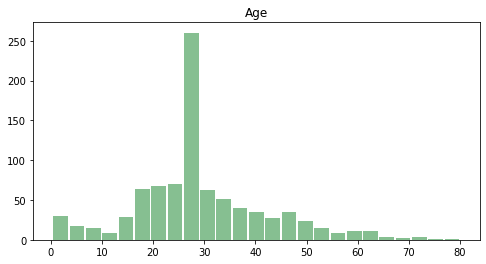

In [6]:

titanic_df.hist(column='Age', bins=25, grid=False, figsize=(8,4), color='#86bf91', zorder=2, rwidth=0.9)

## ¿Quiénes eran los pasajeros del Titanic? 

Antes de llegar a la pregunta principal (quién sobrevivió), echemos un vistazo al DataSet para tener una idea de cómo las observaciones se distribuyen en los diferentes niveles de nuestros factores de interés.

### ¿Cuántos hombres, mujeres y niños hay en nuestra muestra? 


Queremos que a partir de ahora cuando nos dibuje datos de los Hombres, Mujeres , niños Male y Female, siempre utilice los mismos colores
Esto lo podemos hacer con todas las variables. 
¡Cuidado! si utilizamos esta paleta en un gráfico donde no estan estas métricas nos dará un error. 


In [7]:
# definimos una paleta de colores para los diferentes valores 
pal = dict(Hombre="#4682B4", Mujer="#CD5C5C", Niño="#2E8B57", male="#6495ED", female="#F08080")
#pal = dict(Hombre="#4682B4", Mujer="#CD5C5C", Niño="#2E8B57", male="#6495ED", female="yellow")

En el primer gráfico que creemos ¡No necesitamos tablas pivotadas!  
Como hemos comentado Seaborn agrega la información automáticamente

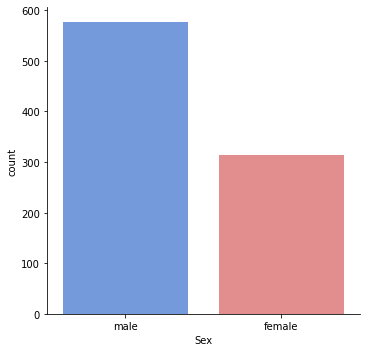

In [8]:
sns.catplot( data=titanic_df,x='Sex',kind='count',palette=pal)

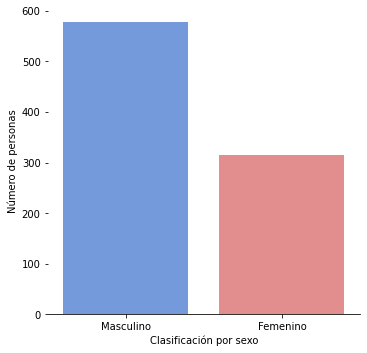

In [9]:
#Primero vamos a contar el número de hombres y mujeres, ignorando la edad.
g=sns.catplot( data=titanic_df,x='Sex',kind='count',palette=pal)
# Al ser  una librería de Matplotlib podemos añadir títutlos, etiquetas sticks.... 
g.despine(left=True)
g.set_titles("Mi primer gráfico Seaborn ")
g.set_ylabels("Número de personas")
g.set_xlabels("Clasificación por sexo")
g.set_xticklabels(["Masculino", "Femenino"])


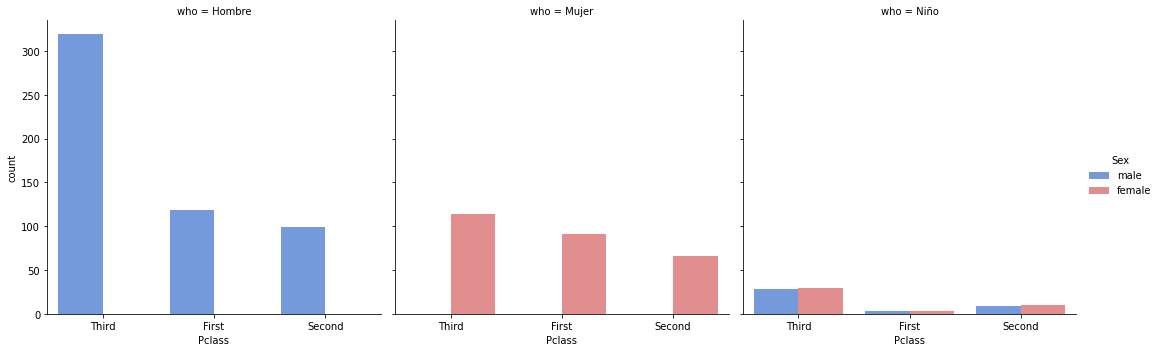

In [10]:
# Vemosla disribución de Hombres y mujeres en las distintas clases 
sns.catplot(x="Pclass", data=titanic_df, hue="Sex",kind='count',col="who",palette=pal) 


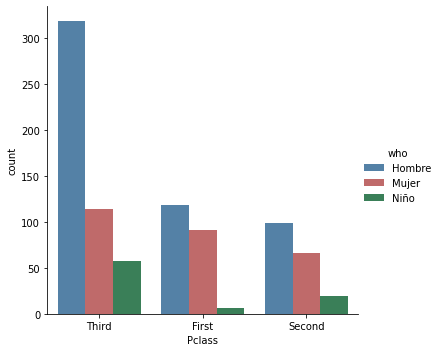

In [11]:
# La distribución además de ser por hombres y mujeres al tener la edad vemos cuales de ellos son niños
sns.catplot(x="Pclass", data=titanic_df, hue="who", palette=pal,kind='count');

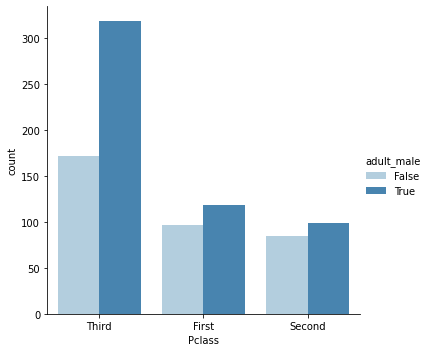

In [12]:
# Tambien  podemos comparar los hombres con el resto de pasajeros ( Mujeres y niños )
sns.catplot("Pclass", data=titanic_df, hue="adult_male", palette="Blues",kind='count');

### Distribución por edades de los grupos definidos

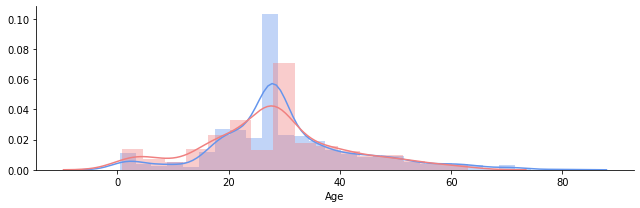

In [13]:
fd = sns.FacetGrid(titanic_df,hue="Sex", aspect=3, palette=pal)
# Vemos la distribución de densidad por hombres y mujeres  
fd.map(sns.distplot, "Age")

#fg.set(xlim=(0, 80));

Si observamos la distplot, la liena continúa en "Age"  menor que 0, para que no aparezca esa linea, limitamos el eje de las x. 

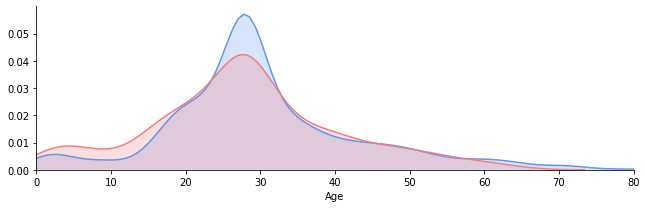

In [14]:
fg = sns.FacetGrid(titanic_df, hue="Sex", aspect=3, palette=pal)
# Vemos la distribución de densidad por hombres y mujeres  
fg.map(sns.kdeplot, "Age", shade=True)

fg.set(xlim=(0, 80));

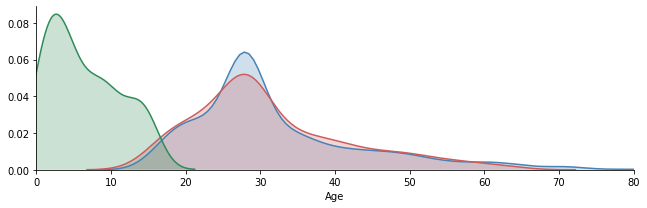

In [15]:
# Esta distribución tambien puede ser por grupos Niños ,hombres y mujeres.
fg = sns.FacetGrid(titanic_df, hue="who", aspect=3, palette=pal)

fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0, 80));

Si queremos que cada clasificación por who aparezca en una columna añadimos row="who" en los parámetros de FacetGrid. 
Esto mismo lo veremos con otro ejempo a continuación 

### ¿Cómo se distribuyen los pasajeros de las distintas clases?

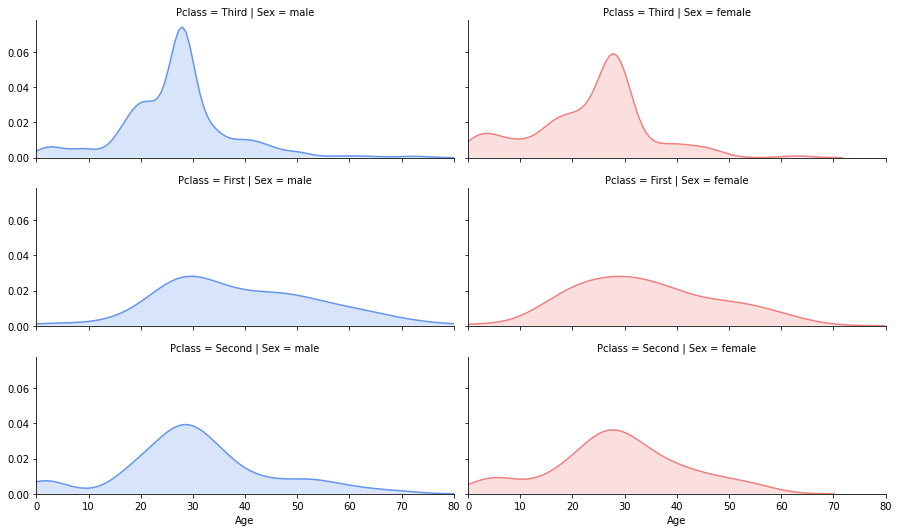

In [16]:
# creamos 6 ( 2x3) lienzos, uno para Male otro para female y para las 3 clases 
fg = sns.FacetGrid(titanic_df, col="Sex", row="Pclass", hue="Sex", height=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "Age", shade=True)
#fg.map(sns.rugplot, "Age")
#sns.despine(left=True)
fg.set(xlim=(0, 80));


### ¿Cuanto pagaron por los billetes los pasajeros de las distintas clases?

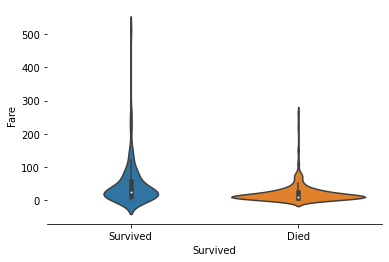

In [17]:
sns.violinplot(x="Survived",y="Fare",data=titanic_df,order=["Survived","Died"])
#Lo podemos escribir de distintas formas
#sns.violinplot(titanic_df["Survived"], titanic_df["Fare"])
#


sns.despine(left=True);

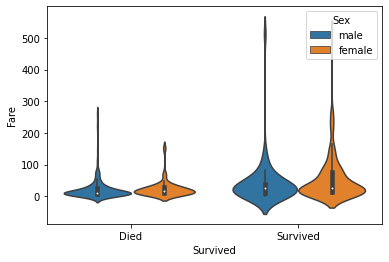

In [18]:
sns.violinplot(x="Survived",y="Fare", hue="Sex", data=titanic_df)

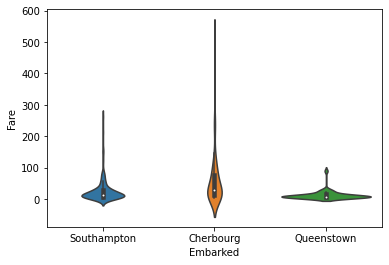

In [19]:
sns.violinplot(titanic_df["Embarked"], titanic_df["Fare"])
#sns.despine(left=True);

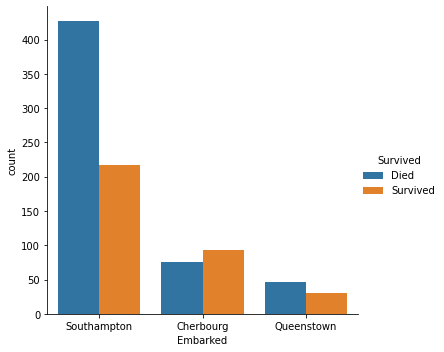

In [20]:
## ¿Cuantas personas sobrevivieron de Cherbourg?
sns.catplot("Embarked", data=titanic_df, hue="Survived",kind='count');

### ¿Cómo es la distribución de las distintas métricas ?

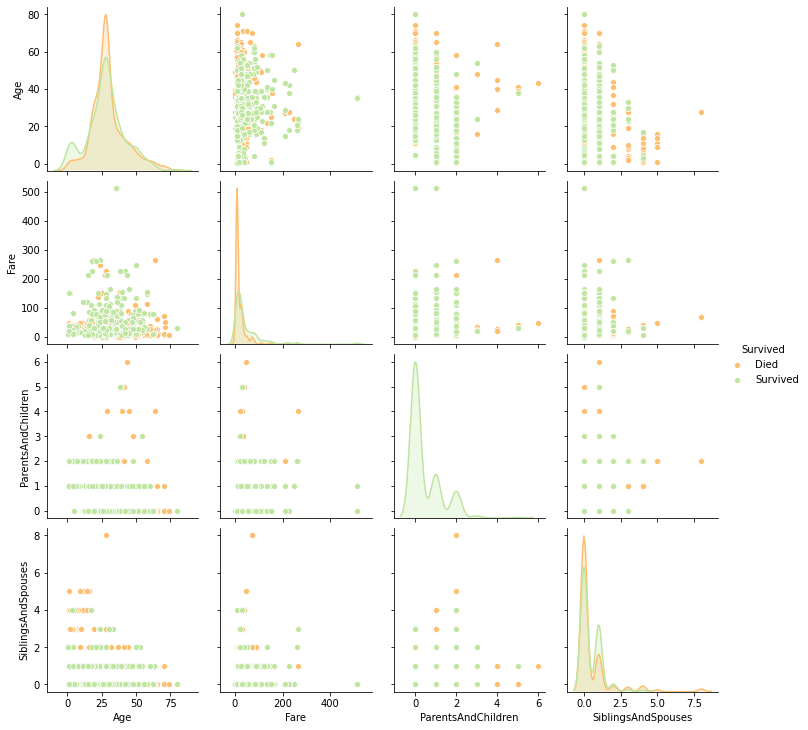

In [21]:
datos=('Age','Fare','ParentsAndChildren','SiblingsAndSpouses')
sns.pairplot(data=titanic_df,vars=datos, hue="Survived",palette='Spectral')


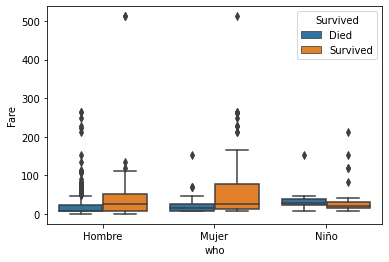

In [22]:

sns.boxplot(x="who", y="Fare", hue="Survived", data=titanic_df);

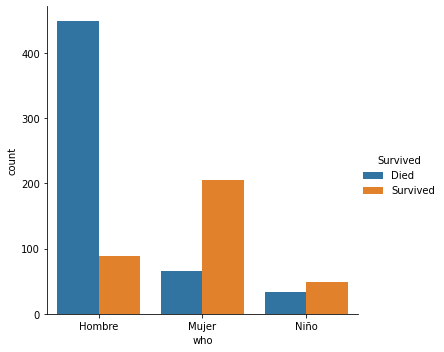

In [23]:

sns.catplot("who", data=titanic_df, hue="Survived", kind='count');

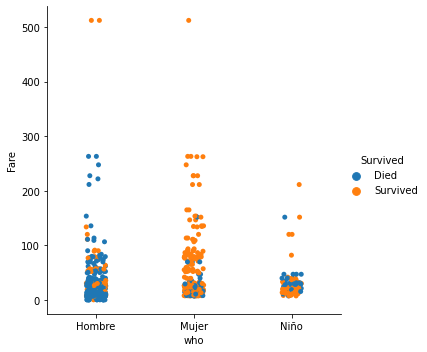

In [24]:
sns.catplot("who", "Fare",hue="Survived" ,data=titanic_df)

### Preguntas. 

* ¿Cómo era la distribución de cubierta ( deck) ?
* ¿Cómo era la distribucion de cubierta en las distintas clases ?
* ¿Cuales eran las tarifas de las cubierta?
* ¿Cómo era la distribucion por edades y tarifas?

In [25]:
#titanic_df.head()
titanic_df.describe()

,PassengerId,Age,SibSp,Parch,Fare,ParentsAndChildren,SiblingsAndSpouses
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208,0.381594,0.523008
std,257.353842,13.019697,1.102743,0.806057,49.693429,0.806057,1.102743
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,6.000000,8.000000


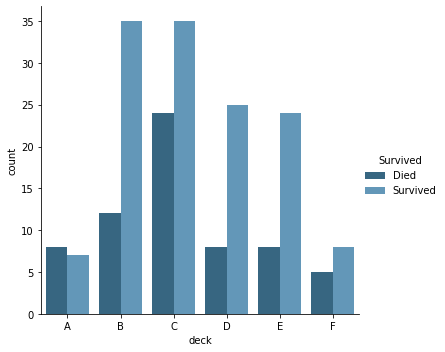

In [26]:

# Distribución cubierta
sns.factorplot(x="deck", data=titanic_df,hue="Survived", palette="PuBu_d",kind='count', order =['A','B','C','D','E','F'] );


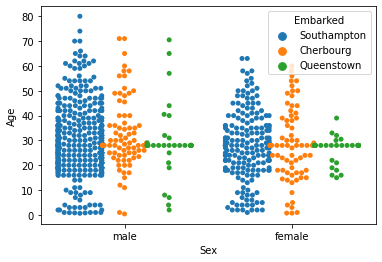

In [27]:
#Distribución por edades
sns.swarmplot(x="Sex",y="Age",hue='Embarked',data=titanic_df, dodge= True)


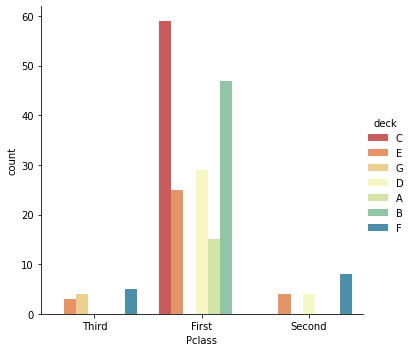

In [28]:

# Distribución Cubierta por clases
sns.factorplot("Pclass", hue="deck", data=titanic_df, palette="Spectral",kind='count');


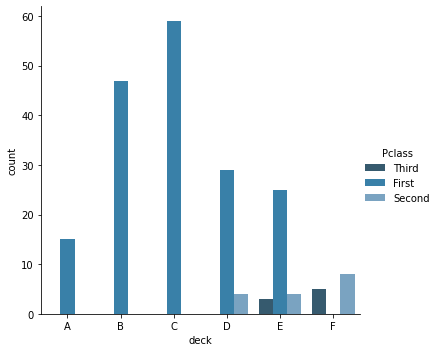

In [29]:
sns.factorplot(x="deck", data=titanic_df,hue="Pclass", palette="PuBu_d",kind='count', order =['A','B','C','D','E','F'] );

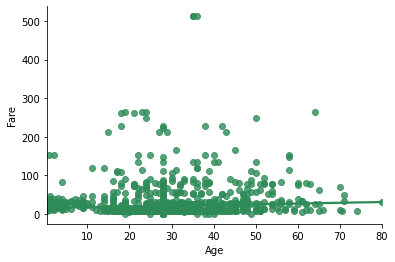

In [30]:
# Distribución tarifas por edad Hint: regplot
sns.regplot("Age", "Fare", data=titanic_df, robust=True, ci=None, color="seagreen")
sns.despine();



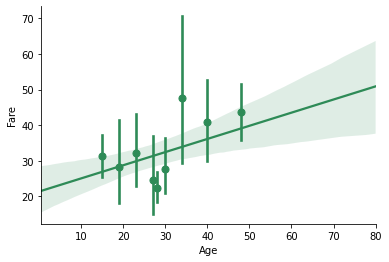

In [31]:
sns.regplot("Age", "Fare", data=titanic_df, color="seagreen", x_bins=10)
sns.despine();

#  ¿Qué es Bokeh?

Bokeh es una biblioteca de visualización interactiva de Python que se dirige a navegadores web modernos para su presentación. Su objetivo es proporcionar una construcción elegante y concisa de gráficos novedosos al estilo de D3.js y ampliar esta capacidad con interactividad de alto rendimiento en conjuntos de datos de gran tamaño o de transmisión. Bokeh puede ayudar a cualquiera que desee crear trazados interactivos, cuadros de mando y aplicaciones de datos de manera rápida y fácil.

* Libreria de Python para generar **visualizaciones interactivas** en navegadores web.
 * Sintaxis sencilla y concisa pero potente
 * Gráficos elegantes e interactivos
 * Sin necesidad de escribir Javascript, HTML o CSS
 * Buen rendimiento en grandes cantidades de datos y posibilidad de streaming
 * Compatible con Jupyter Notebook
 
* Creada en 2014 y mantenida por  Anaconda, Inc.
* Open Source
* Tiene también interfaces para R, Scala y Julia.




# ¿Cómo instalar Bokeh?

* Con pip : ```pip install bokeh```
* Con conda: ````conda install bokeh````

Importaciones y configuración

Al usar la interfaz bokeh.plotting, hay algunas importaciones comunes:  
• Utilice la función de figura para crear nuevos objetos de parcela para trabajar.  
• Llame a las funciones output_file, output_notebook y output_server (posiblemente en combinación) para decirle a Bokeh cómo mostrar o guardar la salida.  
• Ejecute mostrar y guardar para mostrar o guardar gráficos y diseños.  
https://github.com/bokeh/bokeh-notebooks/tree/master/tutorial



In [32]:
# importamos las librerias necesarias para empezar a trabajar. 
from bokeh.plotting import figure, output_notebook, show
from bokeh.resources import INLINE
from bokeh.layouts import row

output_notebook()

# nos aseguramos que aparezca BokehJS<version > successfully loaded. 

Loading BokehJS ...

Interfaces: 
    bokeh.models - desarroladores -  mucho trabajo
    bokeh.plotting - personalización - 
    bokeh.charts - high level interface. 

# Pasos para crear un gráfico

1. Preparar los **datos** que vamos a visualizar (listas de python)

2. Seleccionar donde se va a mostrar el gráfico (el *output* o salida):
    * Para notebooks -> **`output_notebook()`**
    * Para exportar a html -> `output_file()`
    
3. Inicializar el gráfico vacio con **`figure()`** y configurar:
    * titulo del gráfico
    * etiquetas de los ejes
    * herramientas interactivas
    * ...
4. Añadir las distintas capas que representen nuestros datos:
    * líneas
    * circulos
    * barras
    * ...
5. LLamar **`show()`** para mostrar los resultados o **`save()`** para guardarlos.



Interfaces: 
*    bokeh.models - desarroladores -  mucho trabajo
*    bokeh.plotting - personalización - 
*    bokeh.charts - high level interface. 

Creamos un grafico de burbujas muy sencillo¶ 
* Veamos que herramientas interactivas vienen con el gráfico

## Glyphs

De cierta empresa, disponemos de infromación relativa a una de sus maquinas de movimiento de tierra. 
Por una parte tenemos horas que es la información de cuantas horas ha trabajado cada día esa máquina. 
Además tenemos volumen, cantidad de tierra extraida en cada jornada. 

In [33]:
horas=[10,8,13,9,11,14,6,4,12,7,5]
volumen=[8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68]

Crea un gráfico con la dispersión de las horas trabajadas y el volumen extraido. 
* p.circle ( variable_x,variable_y)  nos dibuja circulos. 
* p.triangle( variable_x,variable_y) nos dibuja triangulos


In [34]:
#¿Cual es la variable x y la y en nuestro caso?

Object `caso` not found.


In [ ]:
#¿Cual es la variable x y la y en nuestro caso

In [37]:
#¿Cual es la variable x y la y en nuestro caso

In [ ]:
#¿Cual es la variable x y la y en nuestro caso

#### Diagrama de puntos (Scatter Plot)

* Añadir puntos a la figura con *```circle()```* (o ```square()```, ```triangle()```, etc. para más formas)
* Atributos:
    * color de los puntos (```color```)
    * tamaño de los puntos (```size```)
    * transparencia de los puntos (```alpha```)
    * ...

In [36]:
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

# Creamos un p.circle con los datos de horas y volumen
p.circle(horas,volumen)
# show the results
show(p) 

 Con line_color, fill_color, fill_alpha podemos personalizar el gráfico

In [ ]:
p = figure(plot_width=300, plot_height=300)

#añadimos a la figura circulos con size, color y transparencia para ello utilizamos p.circle(horas,volumen, line_color=..., fill_color=.... )
p.circle(horas,volumen, line_color="navy", fill_color="orange", fill_alpha=0.5)
#mostramos el resultado . Utilizamos show(p)
show(p)

Todos los marcadores Bokeh aceptan el tamaño, para todas las marcas, como  una propiedad. Los círculos también tienen radio (medido en unidades para cada dato).

In [ ]:
# EJERCICIO. cambia la propiedad de size por radius. 

#creamos una nuevo dibujo creando la figura. 
p = figure(plot_width=300, plot_height=300)

#añadimos a la figura circulos con size, color y transparencia 
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], radius=[0.1,0.1,0.2,0.2,0.5], line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results

Añadimos distintas lineas y ciruclos a un mismo dibujo. 

In [ ]:
# set up some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 7, 3]
y2= [3,6,5,4,2]

# creamos un nuevo dibujo dentro de la figura. 
p = figure(plot_width=400, plot_height=400)

# Añadimos lineas, circulos y triangulos al mismo dibujo
# Ejercicio : cambiamos los colores. 
p.line(x, y, line_width=2,line_color="red")
p.circle(x, y, fill_color="white", size=8)
p.line(x,y2,line_width=3)
p.triangle(x, y2, fill_color="pink", size=8)
show(p) # show the results


Basándonos en estas propiedades :
    Con radius definimos el tamaño de cada (x,y) en nuestro caso 
* ¿Qué variable podríamos utilizar además del volumen por horas que ya tenemos?

In [ ]:
energia=[0.1,0.1,0.1,0.1,0.3,0.3,0.2,0.4,0.1,0.1,0.1]

Añadimos el tamaño de las burbujas a nuestro gráfico. 

In [ ]:
p = figure(plot_width=300, plot_height=300)
#añadimos a la figura circulos con size, color y transparencia y radius es el valor de energia
p.circle(horas,volumen, line_color="navy",radius=energia, fill_color="orange", fill_alpha=0.5)
# mostramos el resultado
show(p)

Adicionalmente nos han pasado la estimación de volumen por horas trabajadas, queremos unir esa información al grafico.
La estimación es lineal, por lo que nos interesará unirla en un grafico de lineas p.line
Añadimos distintas lineas y círculos a un mismo dibujo. 

In [ ]:
estimacion=[8,7,9.5,7.5,8.5,10,6,5,9,6.5,5.5]

#### Diagrama de lineas (Line chart)

* Añadir lineas a la figura con *```line()```*
* Atributos:
    * color de las lineas (```color```)
    * grosor de las lineas (```line_width```)
    * transparencia de las lineas (```alpha```)
    * patrón de trazo de las lineas (```line_dash```)
    * ...

In [ ]:
# creamos un nuevo dibujo dentro de la figura. 
p = figure(plot_width=400, plot_height=400)

# a nuestro gráfico de p.circle le añadimos una linea con horas y estimación
p.circle(horas, volumen, fill_color="white", size=8)
# utiliza line_width , line_color ..

p.line(horas, estimacion, line_width=2,line_color="red")

#mostramos el resultado
show(p)


## Configurando las herramientas de los gráficos


Bokeh viene con una serie de herramientas por defecto que nos permiten interactuar con los gráficos.
Definimos  en la figura ( p=figure....) el conjunto de herramienas(tools=) con las que queremos trabajar. 

Una vez creada la figura podemos añadir más herramientas con p.add_tools(NombreTool())

In [ ]:
from bokeh.plotting import figure, show, output_notebook

output_notebook()

# create a new plot with the toolbar below
p = figure(plot_width=400, plot_height=400)

p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=10)

show(p)

Además, podemos activar o desactivar a nuestro gusto:

* Gestos 
    * Pan (movimientos)
    * Scroll (rueda)
    * Tap (click)
    

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import TapTool, ColumnDataSource
from bokeh.models.callbacks import CustomJS

output_notebook()

# añadimos herramientas de gestos
p = figure(plot_width=400, plot_height=400, tools="pan,wheel_zoom,box_zoom")

# creamos una funete de datos. 
source = ColumnDataSource(
    data=dict(
        x=[1, 2, 3, 4, 5],
        y=[2, 5, 8, 2, 7],
    )
)


In [ ]:
# dibujamos los datos 
p.circle('x','y', size=10, source=source)

# definicion de una herramienta con comportamiento personalizado
tap_tool = TapTool()

# Definimos un evento cuando se clickea: una alerta 
tap_tool.callback = CustomJS(args=dict(source=source),
                           code=""" alert('Seleccionado: '+source.selected['1d'].indices[0]) """)


# añadimos la herramienta a la figura
p.add_tools(tap_tool)

show(p)

### Opcional 

In [ ]:
from bokeh.models import ColumnDataSource, OpenURL, TapTool, CustomJS
from bokeh.plotting import figure, output_file, show

output_notebook()


source = ColumnDataSource(data=dict(
    x=[1, 2, 3, 4, 5],
    y=[2, 5, 8, 2, 7],
    color=["navy", "orange", "olive", "firebrick", "gold"]
    ))


callback = CustomJS(args=dict(source=source), code="""
        //
        Aqui escribimos el codigo JS , no lo utilizamos de momento
        get data source from Callback args
        var data = source.data;
        var geometry = cb_data['geometries'];



        /// calculate x and y
        var x = geometry[0].x
        var y = geometry[0].y


        /// update data source
        data['x'].push(x);
        data['y'].push(y);
        data['color'].push('gold')
        
        // trigger update of data source
        source.trigger('change');
    """)


taptool = TapTool(callback=callback)
p = figure(plot_width=400, plot_height=400,
           tools=[taptool], title="Click the Dots")
p.circle('x', 'y', color='color', size=20, source=source)
show(p)

* Acciones
    * Undo/Redo (deshacer/rehacer)
    * Reset (reiniciar gráfico)
    * Save (guardar PNG)
    

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import TapTool

output_notebook()

# añadimos herramientas de acciones
p = figure(plot_width=400, plot_height=400, tools="pan,wheel_zoom,reset,save")
#p = figure(plot_width=400, plot_height=400, tools="pan")

p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=10)
# veamos que acciones podemos ejercer. 
show(p)

* Inspectores
    * Hover (tooltip)
    * Crosshair (punto de mira)

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool

output_notebook()

# añadimos herramientas de inspectores
p = figure(plot_width=400, plot_height=400, tools="pan,wheel_zoom,crosshair")

source = ColumnDataSource(
    data=dict(
        x=[1, 2, 3, 4, 5],
        y=[2, 5, 8, 2, 7],
    )
)

p.circle('x','y', size=10, source=source)

tooltips = [
    ("X coord", "@x"),
    ("Y coord", "@y")
]
hover_tool = HoverTool(tooltips=tooltips)
p.add_tools(hover_tool)

show(p)

### Ejemplo 1: Configuración de Heramientas

In [ ]:
#Cargamos unos datos de muestra, esto puede llevar algún tiempo
import bokeh.sampledata 
#bokeh.sampledata.download()


In [ ]:
#Añadimos tantas herramientas como necesitemos 
from bokeh.models import HoverTool, BoxSelectTool,LassoSelectTool,PanTool,TapTool #For enabling tools

#bokeh.sampledata.download()
#Importamos un conjunto de adatos de muestra 
from bokeh.sampledata.glucose import data


Con estos datos de muestra vamos a crear un grafico para ver la configuracion de las herrameintas. 

In [ ]:
# Seleccionamos las herramientas que necesitamos
TOOLS = [BoxSelectTool(), LassoSelectTool(),HoverTool(),PanTool(),TapTool()]

# configuramos el lienzo 
p = figure(plot_width=400, plot_height=300, tools=TOOLS)

# definimos los datos de ejemplo, aplicamos filtro
subset = data.loc['2010-10-06']
x, y = subset.index.to_series(), subset['glucose']

#dibujamos 
p.line(x, y, line_dash="4 4", line_width=1, color='gray')

show(p)

cambiemos las propiedades

In [ ]:
#EJERCICIO 

# Basic plot setup
p = figure(width=600, height=300, x_axis_type="datetime", title='Hover over points')

p.cross(x, y, line_dash="4 4", line_width=1, color='gray')
# Añadimos otro gráfico con y1=2*y
#y1=2*y
#p.cross(x, y1, line_dash="4 4", line_width=1, color='orange')

cr = p.circle(x, y, size=20,
              fill_color="red", hover_fill_color="firebrick",
              fill_alpha=0.05, hover_alpha=0.3,
              line_color=None, hover_line_color="white")
# mode= hline, vline, mouse
p.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='mouse'))

show(p)

In [ ]:
# EJECICIO - UTILIZAR hover y luego añadir Crosshair 
from bokeh.models import CrosshairTool
from bokeh.models import ColumnDataSource
source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=300, plot_height=300, tools=[hover], title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)



# Ejercicio

In [ ]:
# Añadimos CrosshairTool , muy importante tenerlo previamente importado. 
p.add_tools(CrosshairTool())
show(p)

In [ ]:
# EJERCICIO : Añadir herramientas al grafico que teníamos. 
hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
        ]
    )
p = figure(plot_width=400, plot_height=300, tools=[hover], title="Mouse over the dots")

# create a new plot with default tools, using figure
#p = figure(plot_width=400, plot_height=300)

# add a circle renderer with a size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], radius=[0.1,0.1,0.2,0.2,0.5], line_color="navy", fill_color="orange", fill_alpha=0.5)

show(p) # show the results

## Actualizacion y manejo de dibujos 

In [38]:
## importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Formas de pasar datos a Bokeh

Bokeh posee dos formas distintas de pasar los datos a los gráficos:
* Directamente
    * como hemos visto antes pasando los datos por valor , creamos horas=[8,6.5,,,] , volumen=[5,6,...]
    * simple pero menos potente
* Indirectamente
    * a través de una estructura `ColumnDataSource` o dataframe de pandas
        * los datos se pasan por _referencia_ en vez de por _valor_
    * compleja pero más potente

In [39]:
# Importamos los datos de alquiler de bicicletas. 

data_path = 'hour_chicago.csv'

df_datos = pd.read_csv(data_path)

df_datos['dteday'] = pd.to_datetime(df_datos['dteday']) # Tratamiento para fechas
df_datos.head()

FileNotFoundError: [Errno 2] File hour_chicago.csv does not exist: 'hour_chicago.csv'

In [ ]:
# filtramos solo años 0 y estación 2

datos_0=df_datos[(df_datos['yr']== 2016)&(df_datos['season']==2)]
datos_0.head()

In [ ]:
# Ejercicio :cambiamos a las herramientas que mas nos gustan.
from bokeh.models import BoxZoomTool,WheelZoomTool 

# BoxSelectTool,LassoSelectTool,PanTool,TapTool #For enabling tools
# BoxZoomTool(), ResizeTool()
# BoxSelectTool(), LassoSelectTool(),HoverTool(),PanTool(),TapTool()
# hacemos una seleccion de herramientas 

TOOLS = [BoxSelectTool(),HoverTool(),PanTool(),BoxZoomTool(),WheelZoomTool()]

# Vemos donde localizamos la barra
opts1 = dict(plot_width=350, plot_height=350,tools=TOOLS,toolbar_location="below", min_border=0)

In [ ]:
p1 = figure(**opts1)
p1.circle(datos_0.cnt, datos_0.temp,radius=10*datos_0.hum ,color = 'red')
show(p1)

#### ¿Podemos tener dos lienzos con datos de distintas fuentes?

In [ ]:
# damos opciones de lienzo 
opts = dict(plot_width=250, plot_height=250, min_border=0)


In [ ]:
# aplicamos las opciones al lienzo 1 y lo dibujamos en la fila1 ( row1)
p1 = figure(**opts)
r1 = p1.circle(datos_0.cnt, datos_0.temp,radius=10*datos_0.hum ,color = 'red')

# aplicamos las opciones al lienzo 2 y lo dibujamos en la fila2 ( row2)

p2 = figure(**opts)
r2 = p2.circle([1,2,3], [6,5,4], size=20)

# get a handle to update the shown cell with
t = show(row(p1, p2), notebook_handle=True)


¿Cómo hacemos si queremos dibujar un gráfico que ya tenemos, sin necesidad de volver a publicarlo?

 #### Modificamos el gráfico que ya tenemos renderizado sin necesidad de volverlo a dibujar

In [ ]:
from bokeh.io import  push_notebook
# this will update the left plot circle color with an explicit handle
r1.glyph.fill_color = "white"
push_notebook(handle=t)

In [ ]:
# and this will update the right plot circle color because it was in the last shown cell
r2.glyph.fill_color = "pink"
push_notebook()


In [ ]:
t

In [ ]:
p3 = figure(**opts)
r3 = p3.circle([1,2,3], [5,5,5], size=20)

# get a handle to update the shown cell with
t2 = show(p3, notebook_handle=True)


In [ ]:
# ¿Que celda nos va a actualizar t2?
t2

In [ ]:
# this updates the immediately previous cell with an explicit handle
r3.glyph.fill_color = "orange"
push_notebook(handle=t2)

## Demos interactivas 

### Barra

In [ ]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Slider


slider = Slider(start=0, end=10, value=1, step=.1, title="foo")

show(widgetbox(slider))


In [ ]:
from ipywidgets import interact
import numpy as np
# definimos x desde 0 a 2pi ( 6 aprox)
x = np.linspace(0, 2*np.pi, 2000)
# definimos y como la funcion de seno de x
y = np.sin(x)


Dibujamos ahora x,y siendo y=seno(x)

In [ ]:
source = ColumnDataSource(data=dict(x=x, y=y))
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)



In [ ]:
# definimos f como tres posibles funciones : seno coseno tangente. 
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [ ]:
show(p, notebook_handle=True)

In [ ]:
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))


## ejemplo 

In [ ]:
df_datos.head()

In [ ]:
#Creamos dos subconjutos con el mes de Enero y Febrero
mes1=df_datos[(df_datos['yr']== 2016)&(df_datos['mnth']==1)]
mes2=df_datos[(df_datos['yr']== 2016)&(df_datos['mnth']==2)]

# creamos una figura
p3=figure(width=400,height=300)
# a la figura le unimos los dos subconjuntos

p3.circle(mes1.cnt, mes1.temp,radius=10*mes1.hum ,color = 'green',legend='Enero')
p3.circle(mes2.cnt, mes2.temp,radius=10*mes2.hum ,color = 'blue',legend='Febrero')

p3.add_tools(HoverTool())
# Activamos la plitica de clic en la leyenda. 
p3.legend.click_policy='hide'
show(p3)

Distintos grids

In [ ]:
from bokeh.layouts import gridplot

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(datos_0.cnt, datos_0.temp,radius=10*datos_0.hum ,color = 'red')

# create another one
s2 = figure(width=250, height=250)
s2.circle(datos_0.cnt, datos_0.hum,radius=10*datos_0.temp ,color = 'blue')

# create and another
s3 = figure(width=250, height=250)
s3.square(datos_0.cnt, datos_0.temp ,color = 'green')
# put all the plots in a gridplot
p = gridplot([[s1, s2], [s3, None]], toolbar_location=None)

# show the results
show(p)

# Anexo - Bokeh

In [ ]:
from bokeh.models.graphs import NodesAndLinkedEdges
from bokeh.models import Circle, HoverTool, MultiLine
from bokeh.models.graphs import from_networkx
from bokeh.models import Range1d, Plot
import networkx as nx




In [ ]:
G = nx.karate_club_graph()

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

# Blue circles for nodes, and light grey lines for edges
graph.node_renderer.glyph = Circle(size=25, fill_color='#2b83ba')
graph.edge_renderer.glyph = MultiLine(line_color="#cccccc", line_alpha=0.8, line_width=2)

# green hover for both nodes and edges
graph.node_renderer.hover_glyph = Circle(size=25, fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=4)

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips=None))

show(plot)

In [ ]:

# We could use figure here but don't want all the axes and titles
plot = Plot(x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

# Set some of the default node glyph (Circle) properties
graph.node_renderer.glyph.update(size=20, fill_color="orange")

show(plot)

## Formas de pasar datos a Bokeh

Bokeh posee dos formas distintas de pasar los datos a los gráficos:
* Directamente
    * como hemos visto antes pasando los datos por valor
    * simple pero menos potente
* Indirectamente
    * a través de una estructura `ColumnDataSource` o dataframe de pandas
        * los datos se pasan por _referencia_ en vez de por _valor_
    * compleja pero más potente

### Ejemplo con paso de datos directos

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

x = [1, 2, 3, 3.5, 4, 5, 1.5, 2.5]
y = [6, 7, 2, 5, 4, 5, 2, 5.5]

p = figure(plot_height=200)
p.circle(x, y, size=10)

show(p)

### Ejemplo con paso de datos indirectos + nuevas dimensiones

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource({
    'x' : [1, 2, 3, 3.5, 4, 5, 1.5, 2.5],
    'y' : [6, 7, 2, 5, 4, 5, 2, 5.5],
    'z': [0.5, 8.5, 6, 12.5, 10, 8, 5, 20],
    'w': ['navy', 'firebrick', 'navy', 'firebrick', 'firebrick', 'firebrick', 'navy', 'navy']
})

p = figure(plot_height=200)
p.circle(x='x', y='y', color='w', source=source)

show(p)

## Datos geográficos

Bokeh permite mostrar mapas y datos geográficos de dos maneras:
* Google Maps
* Mapas nativos

## Organizando los gráficos

Bokeh incluye diversas opciones de estructurar los gráficos. 

* Layouts basados en cuadriculas con filas y columnas
* Todos los items dentro de una fila o columna tienen el mismo tamaño

In [ ]:
from bokeh.io import show
from bokeh.layouts import column, row, gridplot
from bokeh.plotting import figure, output_notebook

output_notebook()


x = list(range(11))
y0 = x
y1 = [10 - i for i in x]
y2 = [abs(i - 5) for i in x]

# crear una figura
s1 = figure(plot_width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# crear otra figura
s2 = figure(plot_width=250, plot_height=250, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# crear aun otra figura
s3 = figure(plot_width=250, plot_height=250, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put the results in a column and show
#grid = gridplot([s1, s2, s3], ncols=2, plot_width=250, plot_height=250)

show(row([s1,s2,s3]))

## Estilizando los gráficos

Bokeh posee multitud de funciones para customizar el estilo de los gráficos:

* Paletas de colores
* Propiedades visuales de los datos
    * lineas
    * relleno
    * texto
* Propiedades visuales de los gráficos
    * dimensiones
    * título
    * fondo
    * ...

In [ ]:
from bokeh.plotting import figure, show, output_notebook

output_notebook()

# dimensiones del gráfico
p = figure(plot_width=900)

# titulo del gráfico
p.title.text='Esto es el titulo'
p.title.text_color = "green"
p.title.text_font = "arial"
p.title.text_font_style = "bold"

# tamaño gráfico
p.plot_height = 400

# fondo del gráfico
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

# contorno del gráfico
p.outline_line_width = 5
p.outline_line_alpha = 0.3
p.outline_line_color = "black"

r = p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=10)

# datos
glyph = r.glyph
glyph.size = 40
glyph.fill_alpha = 0.2
glyph.line_color = "firebrick"
glyph.line_dash = [6, 3]
glyph.line_width = 2

# eje X
p.xaxis.axis_label = "X"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "red"

# eje Y
p.yaxis.axis_label = "Y"
p.yaxis.major_label_text_color = "orange"
p.yaxis.major_label_orientation = "vertical"

# ticks de los ejes
p.axis.minor_tick_in = -3
p.axis.minor_tick_out = 6


show(p)

## Otras características

* Gráficos enlazados
* Leyendas interactivas
* Widgets
* Callbacks Javascript
* Bokeh Server
* Exportar como PNGs y SVGs 

## Ejemplos avanzados

In [ ]:
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

# Ejecutar con esto si falla
#import bokeh
#bokeh.sampledata.download()

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment


palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

In [ ]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

show(p)  # open a browser

# Enlaces de interés

* https://bokeh.pydata.org
* https://github.com/bokeh/bokeh
* https://www.slideshare.net/continuumio/hassle-free-data-science-apps-with-bokeh-webinar?qid=88a53b3d-e9aa-4ece-8782-09fbc48336ae